In [ ]:
# -*- coding: utf-8 -*-
"""Lab-6-SVM.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Az59g2DkfeHUafr25_b2GR321r7kn0kN
"""

import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

digits.target

dir(digits)

digits.target_names

df = pd.DataFrame(digits.data,digits.target)
df.head()

df['target'] = digits.target
df.head(20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

"""Using RBF kernel"""

from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

len(X_train)

len(X_test)

rbf_model.fit(X_train, y_train)

rbf_model.score(X_test,y_test)

"""Using Linear kernel"""

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.9796296296296296

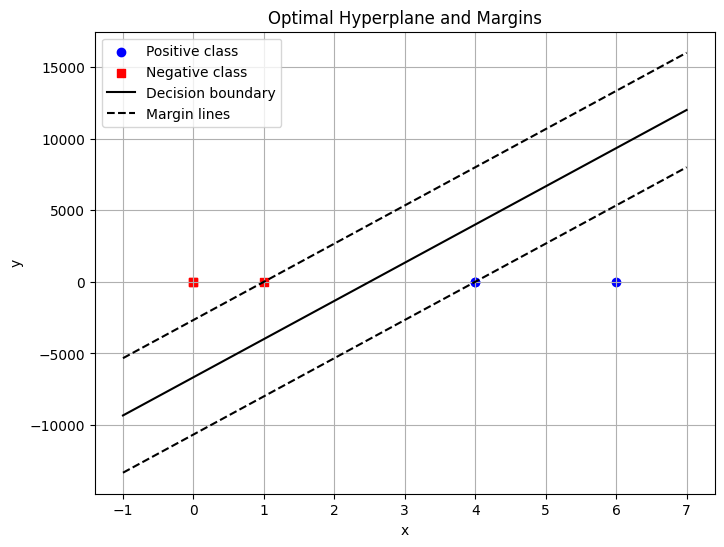

Hyperplane: 0.667x + -0.000y + (-1.667) = 0
Margin on each side: 1.500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Data points
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Fit linear SVM with a very large C to approximate hard-margin
clf = SVC(kernel='linear', C=1e6)
clf.fit(X, y)

# Extract model parameters
w = clf.coef_[0]
b = clf.intercept_[0]

# Compute decision boundary and margins
xx = np.linspace(-1, 7, 500)
yy = -(w[0] * xx + b) / w[1]

# Margin offset: distance = 1/||w||
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0] / w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0] / w[1])**2) * margin

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', label='Positive class')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', label='Negative class')
plt.plot(xx, yy, 'k-', label='Decision boundary')
plt.plot(xx, yy_down, 'k--', label='Margin lines')
plt.plot(xx, yy_up, 'k--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Optimal Hyperplane and Margins')
plt.grid(True)
plt.show()

# Print hyperplane equation
print(f"Hyperplane: {w[0]:.3f}x + {w[1]:.3f}y + ({b:.3f}) = 0")
print(f"Margin on each side: {margin:.3f}")


In [ ]:
import pandas as pd

# Load both datasets
iris_df = pd.read_csv("/content/iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. IRIS DATASET - SVM with RBF and Linear Kernels
X_iris = iris_df.drop("species", axis=1)
y_iris = iris_df["species"]

# Encode labels
le_iris = LabelEncoder()
y_iris_encoded = le_iris.fit_transform(y_iris)

# Split dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris_encoded, test_size=0.2, random_state=42)

# Train models
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')

svm_rbf.fit(X_train_iris, y_train_iris)
svm_linear.fit(X_train_iris, y_train_iris)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_iris)
y_pred_linear = svm_linear.predict(X_test_iris)

In [ ]:
# Accuracy and Confusion Matrix
acc_rbf = accuracy_score(y_test_iris, y_pred_rbf)
acc_linear = accuracy_score(y_test_iris, y_pred_linear)
cm_rbf = confusion_matrix(y_test_iris, y_pred_rbf)
cm_linear = confusion_matrix(y_test_iris, y_pred_linear)

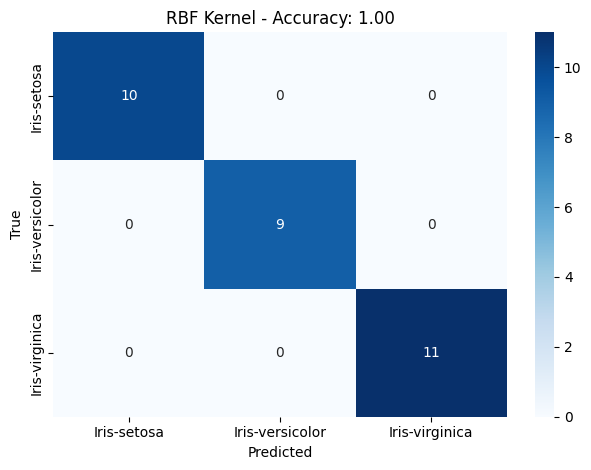

In [ ]:
# Plot confusion matrices
# plt.figure(figsize=(12, 5))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
plt.title(f"RBF Kernel - Accuracy: {acc_rbf:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

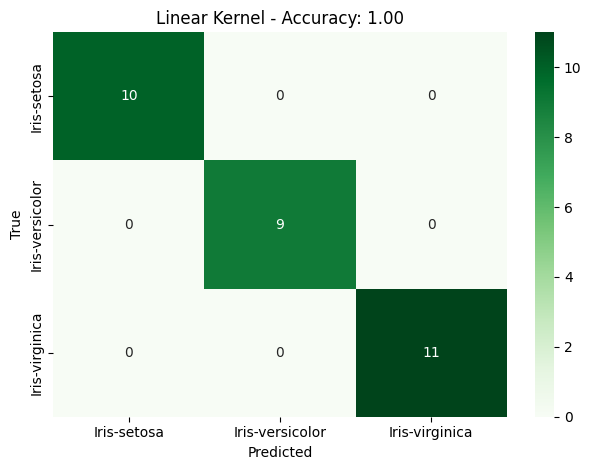

In [ ]:
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Greens', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
plt.title(f"Linear Kernel - Accuracy: {acc_linear:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Accuracy: 0.95
Confusion Matrix:
 [[148   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1 147   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 126   0   2   0   2   1   0   0   2   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 153   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 135   0   3   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   1   0   0   1 134   0   0   1   0   0   0   0   0   0   1   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   1   3   0   0 153   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   3   0   4   0   0   1 118   0   0   4   0   0   1   2   0   0   8
    0   0   1   0   0   1   1   0]
 [  0   0   0   0   0   2   0   0 136   7   0   0   0   0   0   0   0   0
    0   0   0   0   

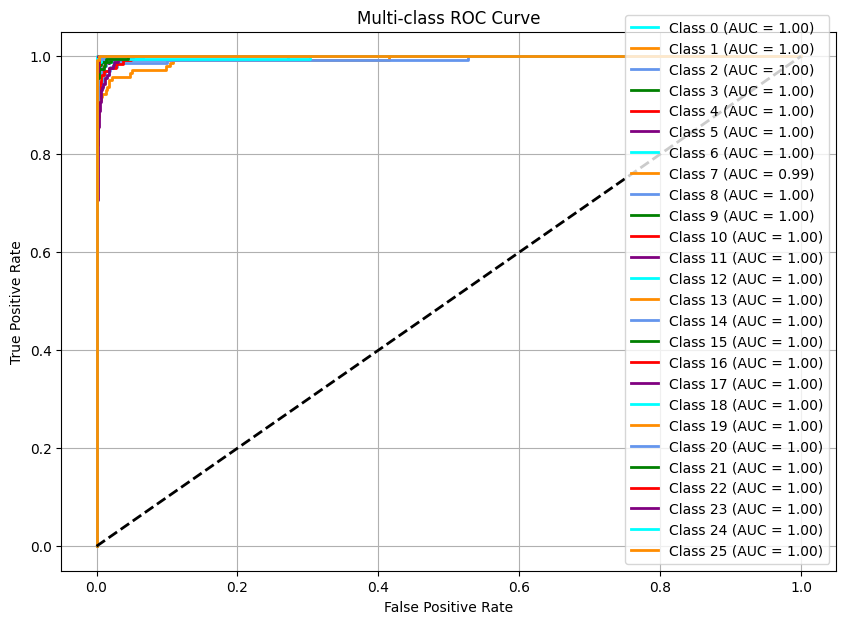

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Load dataset
letter_df = pd.read_csv("/content/letter-recognition.csv")  # Update path if needed
letter_df['letter'] = LabelEncoder().fit_transform(letter_df['letter'])

# Split features and labels
X = letter_df.drop('letter', axis=1)
y = letter_df['letter']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
